# Agg. m6a methylation CTCF profiles (filtered by mokapot q-value)

m6a instances in regions within 100 bp of TSS & with a MSP containing a motif
* 11,094,096: CTCF_L.mokapot.m6a_fiberseq.txt (full positive L, 1% negative L)

total rows per file (merged data)
| dataset | m6a rows |
| :--- | ---: |
| CTCF L small | 11,094,096 |

In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tictoc)
library(ggsci)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tictoc'


The following object is masked from 'package:data.table':

    shift




In [2]:
while (!is.null(dev.list()))  dev.off()
rm(list=ls())

#------------ Helper Functions ------------
# Initiate PDF
openPDF <- function (output_file_fh, pdf_dims) {
  print(sprintf("Saving plots to: %s", output_file_fh))
  # Open PDF
  pdf(output_file_fh, width = pdf_dims[1], height = pdf_dims[2],
      useDingbats=FALSE, family = "ArialMT")
}

# Close PDF
closePDF <- function () {
  while (!is.null(dev.list()))  dev.off()
  print("File saved.")
}

In [3]:
#------------ Step 1. Load data ------------
setwd("/mmfs1/gscratch/stergachislab/mwperez/ctcf-footprinting")

#ARGS
data_folder <- sprintf("%s/mokapot_res", getwd())
output_folder <- sprintf("%s/figures", data_folder)

In [4]:
# CTCF motif types
motif_types <- c("M", "L", "XL", "merged")

## m6a fiberseq data w/ Mokapot q-values (grouped pos & neg)

### CTCF L (normal pos, 1% neg)

In [7]:
# set args
motif_type <- "L"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq.txt", motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)
print(data_file)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/CTCF_L.mokapot.m6a_fiberseq.txt"


In [8]:
# read table
df <- fread(data_file, nrows=n_rows)
dim(df)

[1] 11094096       18

In [9]:
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])

[1] "m6a rows: 11094096"

In [10]:
head(df)

motif_query,motif_name,chrom,centering_position,strand,subset_sequence,reference_start,reference_end,query_name,centered_query_start,centered_query_end,query_length,centered_position_type,centered_start,centered_end,msp_size,Label,mokapot q-value
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-77,-76,225,1,0.0002379379
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-70,-69,225,1,0.0002379379
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-67,-66,225,1,0.0002379379
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-62,-61,225,1,0.0002379379
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-60,-59,225,1,0.0002379379
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-57,-56,225,1,0.0002379379


In [11]:
# unique CTCF motifs, queries, & motif_queries
sprintf("unique motifs: %s", length(unique(df$motif_name)))
sprintf("unique queries: %s", length(unique(df$query_name)))
sprintf("unique motif-query groups: %s", length(unique(df$motif_query)))

[1] "unique motifs: 68427"

[1] "unique queries: 260546"

[1] "unique motif-query groups: 304291"

#### positive vs negative

In [78]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_v_neg.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_L.mokapot.m6a_fiberseq_density-pos_v_neg.pdf"


In [19]:
colnames(df)

[1] "motif_query"            "motif_name"             "chrom"                 
 [4] "centering_position"     "strand"                 "subset_sequence"       
 [7] "reference_start"        "reference_end"          "query_name"            
[10] "centered_query_start"   "centered_query_end"     "query_length"          
[13] "centered_position_type" "centered_start"         "centered_end"          
[16] "msp_size"               "Label"                  "mokapot q-value"

In [27]:
df <- df %>%
    mutate(Label = ifelse(Label == 1, "Positive", "Negative"))


In [80]:
tic()

# copy & filter/sort df
df_p <- df
df_p$dataset_type <- factor(df_p$Label, levels=c("Positive", "Negative"))

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF mokapot output - m6a methylation\n(%s,%s bps): %s total m6a instances", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], dim(df_p)[1])
y_axis_name <- "distance from CTCF start (bp)"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(df_p, aes(x=centered_start, group=dataset_type)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=dataset_type), size=1.2, adjust=0.5) +
    # blue, red
    scale_color_manual(values=c("#2a3d8c", "#be282d")) +
    scale_fill_discrete(name="Data type") +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

7.99 sec elapsed


#### filt by q-val

In [72]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-fdr.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_L.mokapot.m6a_fiberseq_density-fdr.pdf"


In [73]:
# copy & filter/sort df
df_p <- df
df_p$dataset_type <- factor(df_p$Label, levels=c("Positive", "Negative"))

In [74]:
# rename column
names(df_p)[names(df_p) == "mokapot q-value"] <- "FDR"

In [75]:
# add another col indicating above or below FDR
test_fdr <- 0.05
df_p$moka_type <- ifelse(df_p$FDR <= 0.05, TRUE, FALSE)

In [44]:
names(df_p)

[1] "motif_query"            "motif_name"             "chrom"                 
 [4] "centering_position"     "strand"                 "subset_sequence"       
 [7] "reference_start"        "reference_end"          "query_name"            
[10] "centered_query_start"   "centered_query_end"     "query_length"          
[13] "centered_position_type" "centered_start"         "centered_end"          
[16] "msp_size"               "Label"                  "FDR"                   
[19] "dataset_type"           "moka_type"

In [76]:
# separate out positive data only
pos <- df_p[which(df_p$dataset_type == "Positive")]

In [48]:
names(pos)

[1] "motif_query"            "motif_name"             "chrom"                 
 [4] "centering_position"     "strand"                 "subset_sequence"       
 [7] "reference_start"        "reference_end"          "query_name"            
[10] "centered_query_start"   "centered_query_end"     "query_length"          
[13] "centered_position_type" "centered_start"         "centered_end"          
[16] "msp_size"               "Label"                  "FDR"                   
[19] "dataset_type"           "moka_type"

In [51]:
head(df_p)

motif_query,motif_name,chrom,centering_position,strand,subset_sequence,reference_start,reference_end,query_name,centered_query_start,centered_query_end,query_length,centered_position_type,centered_start,centered_end,msp_size,Label,FDR,dataset_type,moka_type
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<fct>,<lgl>
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-77,-76,225,Positive,0.0002379379,Positive,TRUE
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-70,-69,225,Positive,0.0002379379,Positive,TRUE
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-67,-66,225,Positive,0.0002379379,Positive,TRUE
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-62,-61,225,Positive,0.0002379379,Positive,TRUE
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-60,-59,225,Positive,0.0002379379,Positive,TRUE
chr1_1033080_+/m54329U_210813_020940/24183559/ccs,chr1_1033080_+,chr1,1033080,+,GACCTACGGGGGCGGGTGTGGGGACGCCGGACTACGCGTCAGGAGTCCCAGATGGGCCCAGACCCCCATTCCCCGCCCCGGGCCGCAGTGACGTCAGGGCCCGGACGTTCCCGGAACGGCCTCTTGGGGGCGTTCCAGCCCCACGGACCCGCAGGGAGTCCCCGCCGCAATTTGCATGGGGCTCATTTGCATGACCCCGCC,1008277,1033947,m54329U_210813_020940/24183559/ccs,-24816,861,25677,m6a,-57,-56,225,Positive,0.0002379379,Positive,TRUE


In [53]:
table(df_p$Label)["Negative"]

Negative 
 1595563

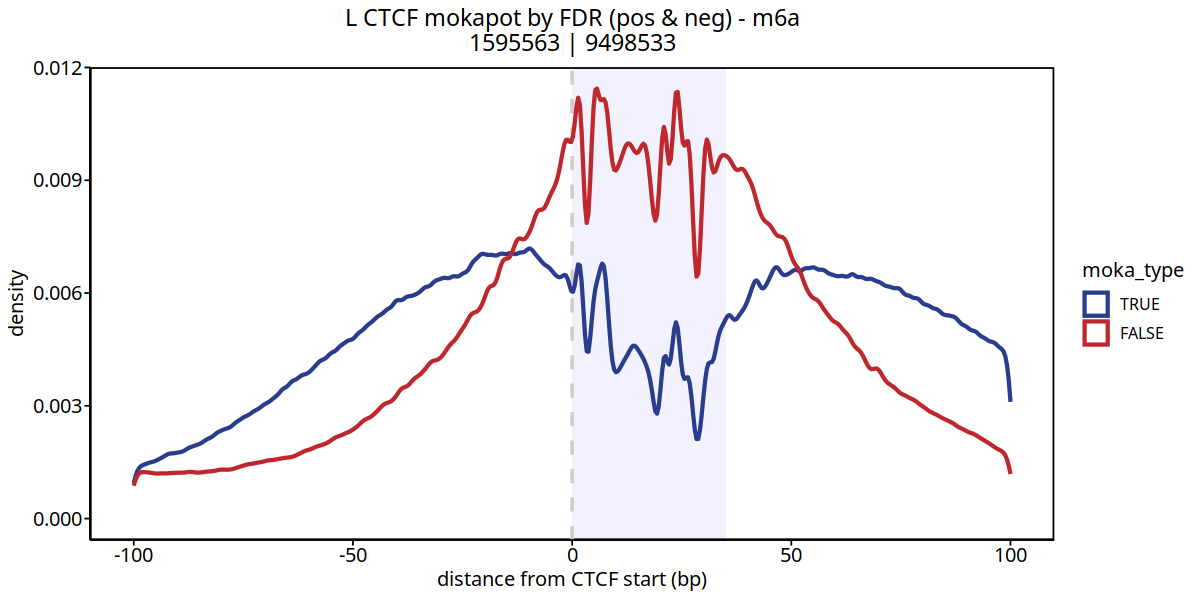

In [77]:
df_p$moka_type <- factor(df_p$moka_type, levels=c(TRUE, FALSE))

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF mokapot by FDR (pos & neg) - m6a\n%s | %s", 
                      motif_type, table(df_p$Label)["Negative"], table(df_p$Label)["Positive"])
y_axis_name <- "distance from CTCF start (bp)"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(df_p, aes(x=centered_start, group=moka_type)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=moka_type), size=1.2, adjust=0.5) +
    # blue, red
    scale_color_manual(values=c("#2a3d8c", "#be282d")) +
    scale_fill_discrete(name="Mokapot FDR", labels=c("FDR =< 0.05", "FDR > 0.05")) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

In [59]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-fdr_positive.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)


#------------ POSITIVE ONLY ------------
df_plt <- df_p[which(df_p$Label == "Positive")]

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_L.mokapot.m6a_fiberseq_density-fdr_positive.pdf"


In [60]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-fdr_positive.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)


#------------ POSITIVE ONLY ------------
df_p$moka_type <- factor(df_p$moka_type, levels=c(TRUE, FALSE))

df_plt <- df_p[which(df_p$Label == "Positive")]

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_L.mokapot.m6a_fiberseq_density-fdr_positive.pdf"


In [65]:
length(which(df_plt$moka_type == TRUE))

[1] 9447709

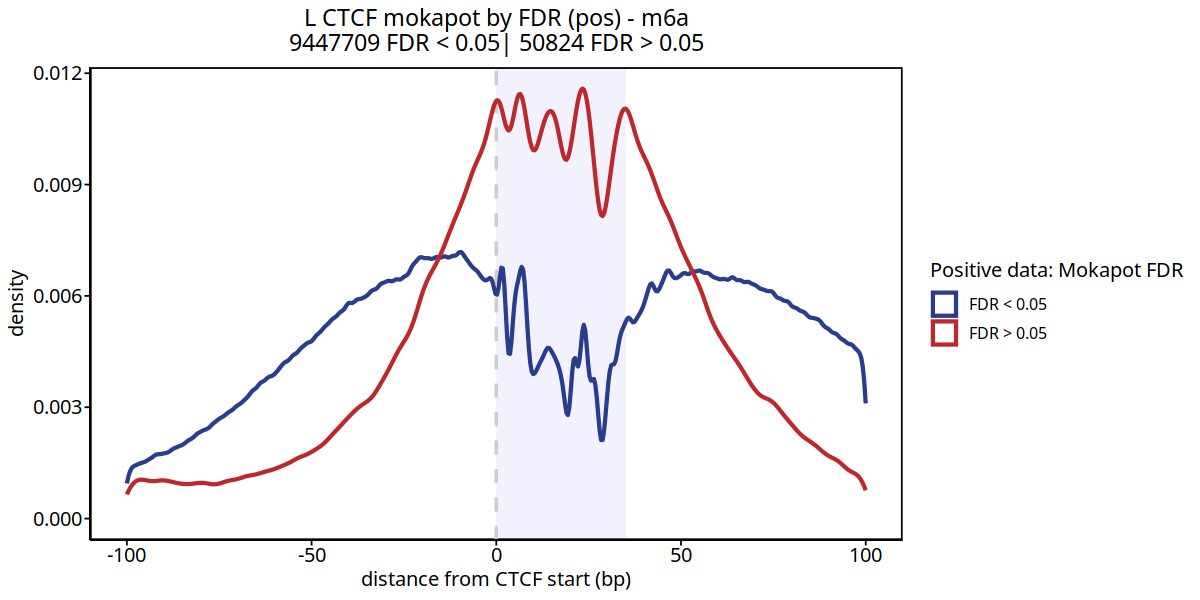

In [71]:
# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF mokapot by FDR (pos) - m6a\n%s FDR < 0.05| %s FDR > 0.05", 
                      motif_type, length(which(df_plt$moka_type == TRUE)), length(which(df_plt$moka_type == FALSE)))
y_axis_name <- "distance from CTCF start (bp)"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(df_plt, aes(x=centered_start, group=moka_type)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=moka_type), size=1.2, adjust=0.5) +
    # blue, red
    scale_color_manual(values=c("#2a3d8c", "#be282d"), labels=c("FDR < 0.05", "FDR > 0.05")) +
    labs(color="Positive data: Mokapot FDR") +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

In [ ]:
tic()

df_p$dataset_type <- factor(df_p$Label, levels=c("Positive", "Negative"))

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF mokapot output - m6a methylation\n(%s,%s bps): %s unique fibers", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df_p$query_name)))
y_axis_name <- "distance from CTCF start (bp)"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(df_p, aes(x=centered_start, group=dataset_type)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=dataset_type), size=1.2, adjust=0.5) +
    # blue, red
    scale_color_manual(values=c("#2a3d8c", "#be282d")) +
    scale_fill_discrete(name="Data type") +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

### CTCF L

In [ ]:
tic()
# set args
motif_type <- "L"
dataset_type = "positive"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_m6a_fiberseq_%s_100bp_%s.txt", motif_type, dataset_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])
# filter by +/- 40 bp around centering site
#df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
#sprintf("-%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], dim(df)[1])
# unique CTCF motifs
sprintf("unique CTCF motifs: %s", length(unique(df$query_name)))
toc()

[1] 12739712       13

[1] "initial rows: 12739712"

[1] "m6a rows: 11464358"

[1] "unique CTCF motifs: 328820"

31.956 sec elapsed


In [12]:
#---------- merge with main df----------
# add col w/ motif type
df$motif_type <- motif_type
# merge adding rows
df_m <- rbind(df_m, df)

In [21]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_m6a_methylation_density_%s.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_m6a_methylation_density_L.pdf"

3.37 sec elapsed


Saving 6.67 x 6.67 in image


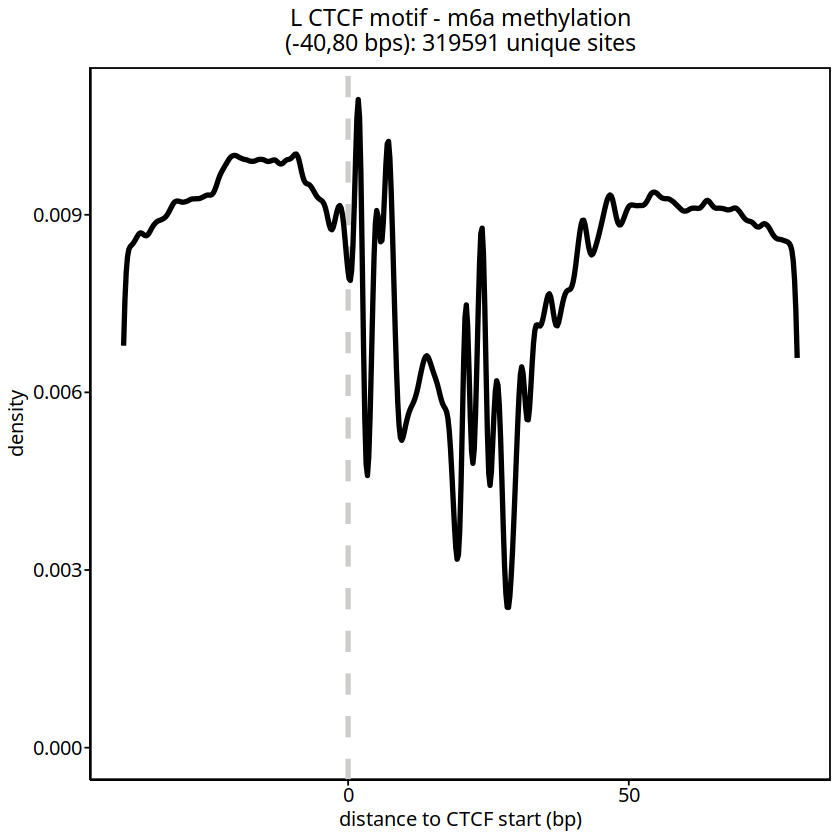

In [22]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif - m6a methylation\n(%s,%s bps): %s unique sites", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

### CTCF XL

In [13]:
tic()
# set args
motif_type <- "XL"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_m6a_fiberseq_%s_100bp.txt", motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])
# filter by +/- 40 bp around centering site
df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
sprintf("-%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], dim(df)[1])
# unique CTCF motifs
sprintf("unique CTCF motifs: %s", length(unique(df$query_name)))
toc()

[1] 10990812       12

[1] "initiral rows: 10990812"

[1] "m6a rows: 9904718"

[1] "--100, +100 rows: 9884924"

[1] "unique CTCF motifs: 284634"

3.763 sec elapsed


In [14]:
#---------- merge with main df----------
dim(df_m)
# add col w/ motif type
df$motif_type <- motif_type
# merge adding rows
df_m <- rbind(df_m, df)
dim(df_m)

[1] 29299476       13

[1] 39184400       13

In [18]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_m6a_methylation_density_%s.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_m6a_methylation_density_XL.pdf"

4.092 sec elapsed


Saving 6.67 x 6.67 in image


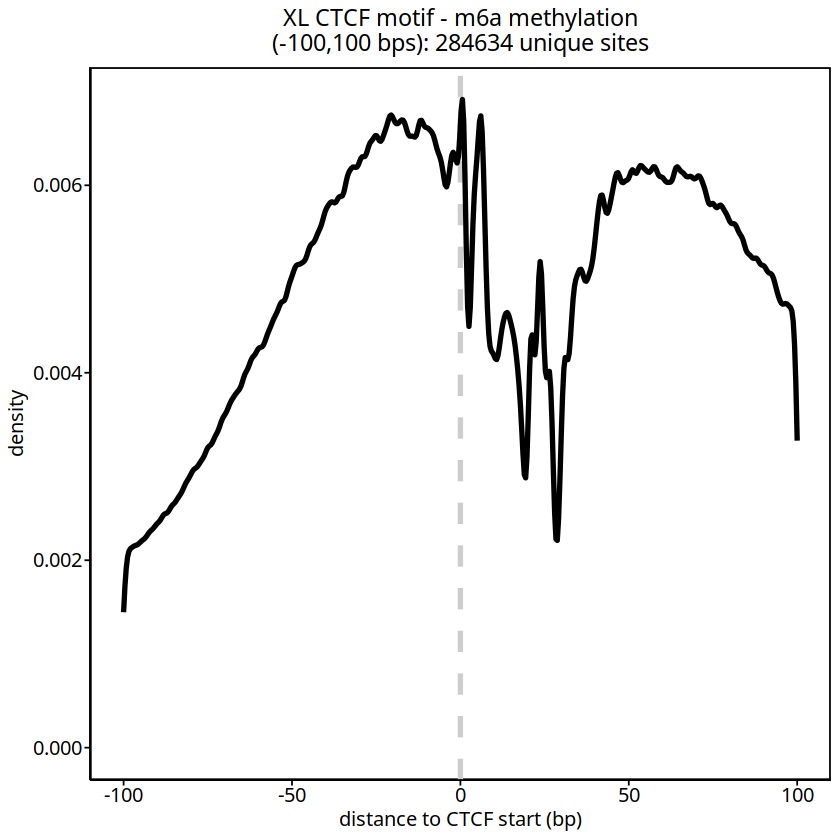

In [19]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif - m6a methylation\n(%s,%s bps): %s unique sites", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

# merged plot (overlayed)

In [15]:
# get merged df
motif_type <- "merged"
df_m <- df_m
ctcf_dist <- c(-100,100)

In [51]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_m6a_methylation_density_%s.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_m6a_methylation_density_merged.pdf"

19.526 sec elapsed


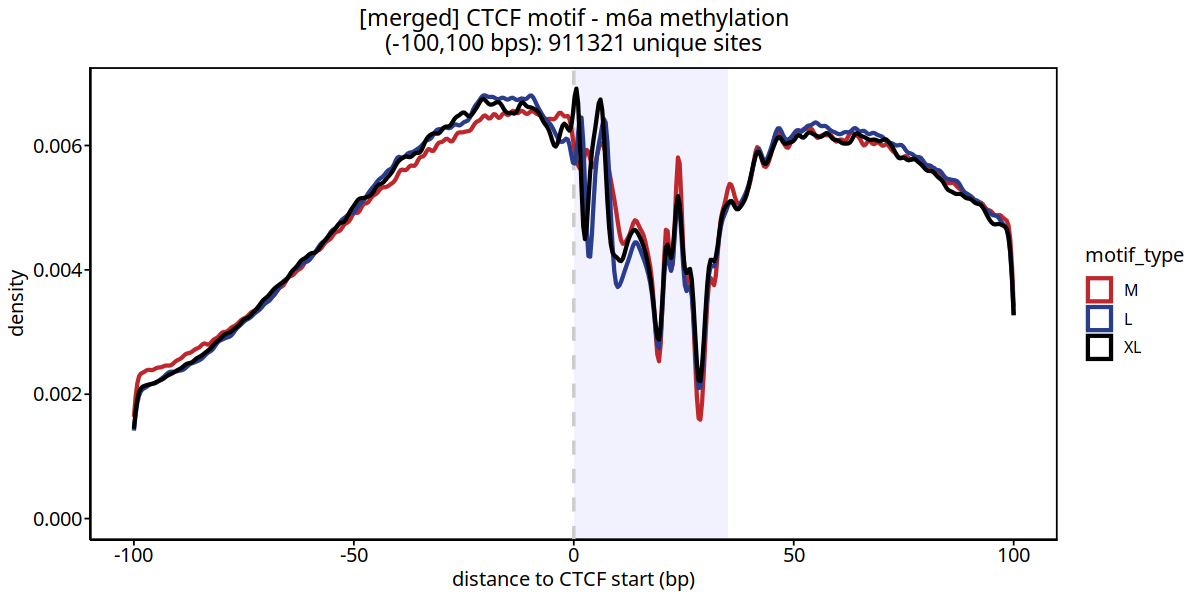

In [52]:
tic()
df_p <- df_m
df_p$motif_type <- factor(df_p$motif_type, levels=c("M", "L", "XL"))

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("[%s] CTCF motif - m6a methylation\n(%s,%s bps): %s unique sites", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df_p$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])

p <- ggplot(df_p, aes(x=centered_start, group=motif_type)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=motif_type), size=1.2, adjust=0.5) +
    # red, blue, black
    scale_color_manual(values=c("#be282d", "#2a3d8c", "#000000")) +
    #scale_color_manual(values=c("#003f5c", "#bc5090", "#ffa600")) +
    #scale_color_aaas() +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name, n.breaks=5) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

# Negative data

| motif group | rows (full) | rows (small) |
| :-- | --: | --: |
| CTCF M | 1,061,806,204 | 10,614,849 |
| CTCF L | 789,999,730 | 7,878,027 |
| CTCF XL | 751,294,635 | 7,482,876 |

In [7]:
# running with small data
data_type = "negative"
data_size = "small"

### CTCF M

In [13]:
tic()

# set args
motif_type <- "M"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_%s_m6a_fiberseq_%s_100bp_%s.txt", data_type, motif_type, data_size)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)

toc()

[1] "initial rows: 10,614,848"

[1] "m6a rows: 7,594,989"

[1] "-100, +100 rows: 7,594,989"

[1] "unique fibers: 85,254"

11.313 sec elapsed


In [35]:
#---------- filter data ----------

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", prettyNum(dim(df)[1], big.mark=","))

[1] "initial rows: 10,614,848"

In [36]:
# filter centered_position_type for m6a & msp
df <- filter(df, centered_position_type == "m6a" | centered_position_type == "msp")
# remove instances w/ N in subset_sequence
df <- filter(df, !grepl("N", subset_sequence))
sprintf("m6a & msp rows: %s", prettyNum(dim(df)[1], big.mark=","))

[1] "m6a & msp rows: 8,248,440"

__workflow__
1. group_by motif & query name
2. filter for motifs within an msp
3. plot

In [37]:
head(df, 1)

chrom,centering_position,strand,subset_sequence,reference_start,reference_end,query_name,centered_query_start,centered_query_end,query_length,centered_position_type,centered_start,centered_end
<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,10000,26121,m54329U_210810_004956/34799917/ccs,-5243,15688,20931,m6a,64,65


In [38]:
# filter for motifs within an msp
# 2,134,952 rows
df_grouped <- df %>%
                group_by(chrom, centering_position, strand, query_name, subset_sequence) %>%
                filter(any(centered_position_type == "msp" & centered_start < 0 & centered_end > 35))
sprintf("m6a & msp rows within an msp: %s", prettyNum(dim(df_grouped)[1], big.mark=","))

[1] "m6a & msp rows within an msp: 2,134,920"

In [41]:
head(df)

chrom,centering_position,strand,subset_sequence,reference_start,reference_end,query_name,centered_query_start,centered_query_end,query_length,centered_position_type,centered_start,centered_end
<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,10000,26121,m54329U_210810_004956/34799917/ccs,-5243,15688,20931,m6a,64,65
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,10000,26121,m54329U_210810_004956/34799917/ccs,-5243,15688,20931,m6a,70,71
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,10000,26121,m54329U_210810_004956/34799917/ccs,-5243,15688,20931,m6a,83,84
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,10000,26121,m54329U_210810_004956/34799917/ccs,-5243,15688,20931,m6a,89,90
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,10000,26121,m54329U_210810_004956/34799917/ccs,-5243,15688,20931,m6a,90,91
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,10000,26121,m54329U_210810_004956/34799917/ccs,-5243,15688,20931,m6a,95,96


In [42]:
df %>% group_by(chrom, centering_position, strand, query_name, subset_sequence) %>% summarise(n = n())

`summarise()` has grouped output by 'chrom', 'centering_position', 'strand', 'query_name'. You can override using the `.groups` argument.


chrom,centering_position,strand,query_name,subset_sequence,n
<chr>,<int>,<chr>,<chr>,<chr>,<int>
chr1,10504,-,m54329U_210810_004956/34799917/ccs,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGG,7
chr1,11051,+,m54329U_210810_004956/34799917/ccs,ACATGCTAGCGCGTCCAGGGGTGGAGGCGTGGCGCAGGCGCAGAGACGCACGCCTACGGGCGGGGTTGGGGGGGGCGTGTGTTACAGGAGCAAAGTCGCACGGCGCCGGGCTGGGGCGGGGGGGGGGGGGCGCCGTGCACGCGCAGAAACTCACGTCACGGCGGCGCGGCGCAGAGACGGGTGGAACCTCAGTAATCCGAA,2
chr1,11314,-,m54329U_210810_004956/34799917/ccs,AGCAGGCGGGCGTGCTGCCACTATTCCTTGAGCAAGAGGACCCTGCAATGTCCCTAGCTGCCAGCAGGCGGCGTGCCACCACTATACAGTAAGCAAGAGGGCCCTGCAGTGCCCCGGCGCCAGCAGGGGGCGCTGGCCACCACTCTAAGCAAGAGAGCCCTGCAGTTGCCCTAGTCGCCAGCAGGGGGCGCCCTGGCACAG,35
chr1,12052,-,m54329U_210810_004956/34799917/ccs,ATTAAGTTACATGCAGACAACAGGGGCCAGAAGATGAACAATGGCCCATCCCACTCTAGGCATGGCTCCTCTCCACAGGAAAACTCCACTCCAGTGCTCAGCTTGCACCCTGGCACAGGCCAGCAGTTGCTGGAAGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCCTGTGACCTCTCAAAGGCCCGGTGGAAA,6
chr1,12310,-,m54329U_210810_004956/34799917/ccs,CTTCCACCTGCTCTCCCAGGGCCAAAGCTAGACCTGCTGAGCCCCTCCCTCCAGCCGGCTGGTCTGAGCAGTCACAGCCTGGCTTTGGGCTCCGATGGCAGCAGACGGCAGGTAGGGGTCCAGCTGCTGGAGCGAGGGCCGGCCACGTATCACAGCCAAGGAGATGAGCACAAGCACTACTTACTGGCCTAGGTTGTGAGA,3
chr1,12378,+,m54329U_210810_004956/34799917/ccs,GCTCCAGCAGCTGGACCCCTACCTGCCGTCTGCTGCCATCGGAGCCCAAAGCCAGGCTGTGACTGCTCAGACCAGCCGGCTGGAGGGAGGGGCTCAGCAGGTCTAGCTTTGGCCCTGGGAGAGCAGGTGGAAGATCAGGCAGGCCATCGCTGCCACAGAACCCAGTGGATTGGCCTAGGTGGGATCTCTGAGCTCAACAAG,10
chr1,13316,-,m54329U_210810_004956/34799917/ccs,GGGGTGGTGGAGGCTCTAGGGAAAGGAAAAGGCAGGAGTGAACTTCCACACAGCAGCAATGGCAGAACCAAAGGTGGCTTTGACCTCCACGAGGGCTCAGATCCAGGCCAACAGCATGTCCAGGACAGGGTGCCGGGTGTATCACTGGTCCAGGAGCACTATGCTGGCAGAATCCCTTTGGTGCCTGATGGCCCTGCCTTC,18
chr1,13554,-,m54329U_210810_004956/34799917/ccs,GTTTCTCCAACGGGCACTAATGCCTGTGCCTGGGTCCTGGCAACACTCTGGACTCCACACTCTCCTGGGTTTCACCTTTGTAGCAGGATCCCTGCAGACCAGGCCCATGACAAACACCGTCTCCAGCGGGCAGAGCAAAGGAAGGGCACAGCGCCAGGCAGTGGTGCAGCTGCCTGTCAGGAAGAGGCCTACTTCTGGTGA,16
chr1,14264,-,m54329U_210810_004956/34799917/ccs,AGGATGCAAACGTCTCGGGGTCAGTGACTGCCTCCTGCCCCTGTTGGTCCCTAGGCAGTGGGGGCAGAAGCTCCCAGCTGACCTGTTTCTCTGGGATGAGAGGGAGGAGAGAAGGGCAGTCAGCAGGGGCAGCTGTTGCAGATGGGAGGAATAGTCTCCCACAAAAAAGGTTTCAGTGACAGACACGGGGTCTCTAAAAAT,15


In [ ]:
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", prettyNum(dim(df)[1], big.mark=","))

# filter by +/- 100 bp around centering site
df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
sprintf("%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], prettyNum(dim(df)[1], big.mark=","))

# unique fibers
sprintf("unique fibers: %s", prettyNum(length(unique(df$query_name)), big.mark=","))


In [14]:
#---------- create df for merged data ----------
df$motif_type <- motif_type
# add col w/ motif type
df_m <- df

In [15]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_%s_m6a_methylation_density_%s_%s.pdf", data_type, motif_type, data_size)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- FALSE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_negative_m6a_methylation_density_M_small.pdf"

3.003 sec elapsed


Saving 6.67 x 6.67 in image


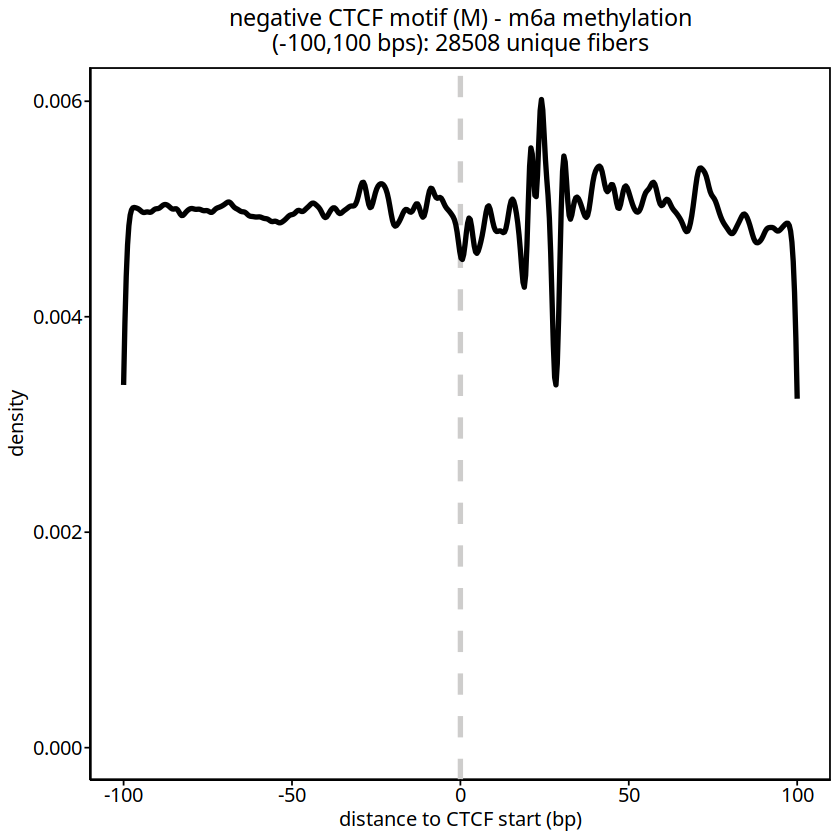

In [15]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif (%s) - m6a methylation\n(%s,%s bps): %s unique fibers", 
                      data_type, motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

### CTCF L

In [16]:
tic()
# set args
motif_type <- "L"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_%s_m6a_fiberseq_%s_100bp_test.txt", data_type, motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])
# filter by +/- 40 bp around centering site
df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
sprintf("-%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], dim(df)[1])
# unique CTCF motifs
sprintf("unique fibers: %s", length(unique(df$query_name)))
toc()

[1] 9999999      13

[1] "initial rows: 9999999"

[1] "m6a rows: 7306553"

[1] "--100, +100 rows: 7306553"

[1] "unique fibers: 53467"

9.121 sec elapsed


In [17]:
#---------- merge with main df----------
# add col w/ motif type
df$motif_type <- motif_type
# merge adding rows
df_m <- rbind(df_m, df)

In [18]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_%s_m6a_methylation_density_%s.pdf", data_type, motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_negative_m6a_methylation_density_L.pdf"

3.363 sec elapsed


Saving 6.67 x 6.67 in image


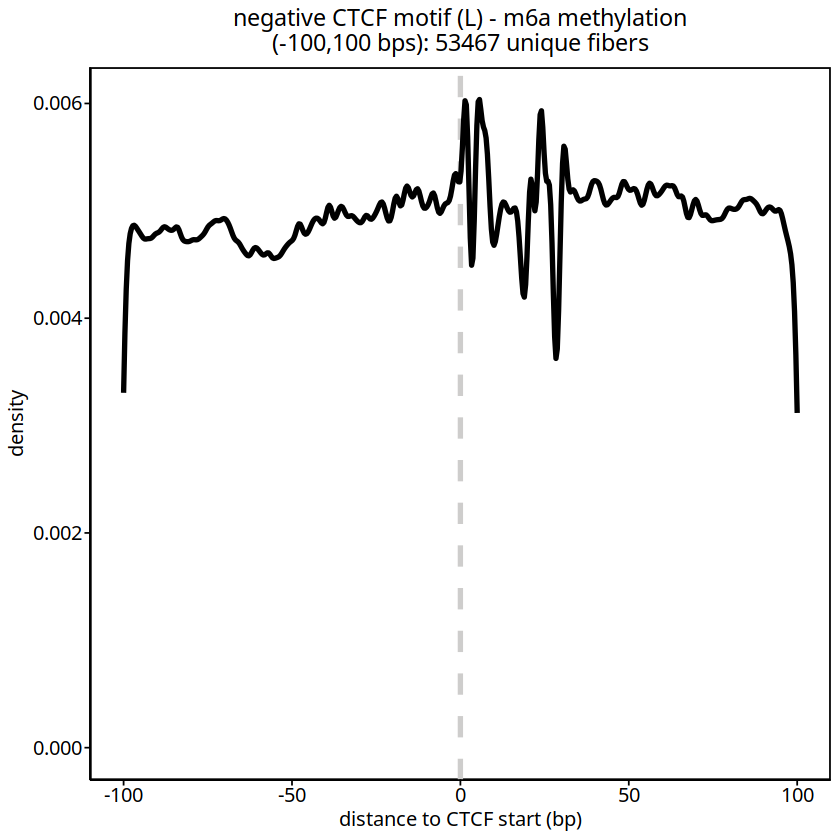

In [19]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif (%s) - m6a methylation\n(%s,%s bps): %s unique fibers", 
                      data_type, motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

### CTCF XL

In [20]:
tic()
# set args
motif_type <- "XL"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_%s_m6a_fiberseq_%s_100bp_test.txt", data_type, motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])
# filter by +/- 40 bp around centering site
df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
sprintf("-%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], dim(df)[1])
# unique CTCF motifs
sprintf("unique fibers: %s", length(unique(df$query_name)))
toc()

[1] 9999999      13

[1] "initial rows: 9999999"

[1] "m6a rows: 7318508"

[1] "--100, +100 rows: 7318508"

[1] "unique fibers: 54607"

8.963 sec elapsed


In [21]:
#---------- merge with main df----------
# add col w/ motif type
df$motif_type <- motif_type
# merge adding rows
df_m <- rbind(df_m, df)

In [23]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_%s_m6a_methylation_density_%s.pdf", data_type, motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_negative_m6a_methylation_density_XL.pdf"

3.411 sec elapsed


Saving 6.67 x 6.67 in image


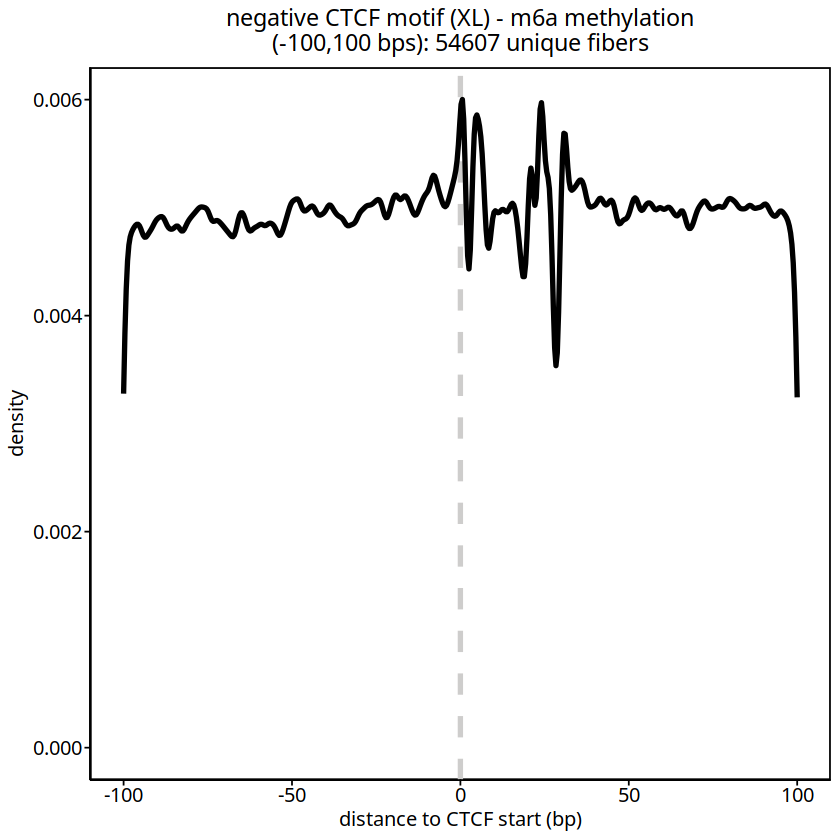

In [24]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif (%s) - m6a methylation\n(%s,%s bps): %s unique fibers", 
                      data_type, motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

## Neg. merged plot (overlayed)

In [25]:
# get merged df
motif_type <- "merged"
df_m <- df_m
ctcf_dist <- c(-100,100)

In [26]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_%s_m6a_methylation_density_%s.pdf", data_type, motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_negative_m6a_methylation_density_merged.pdf"

12.102 sec elapsed


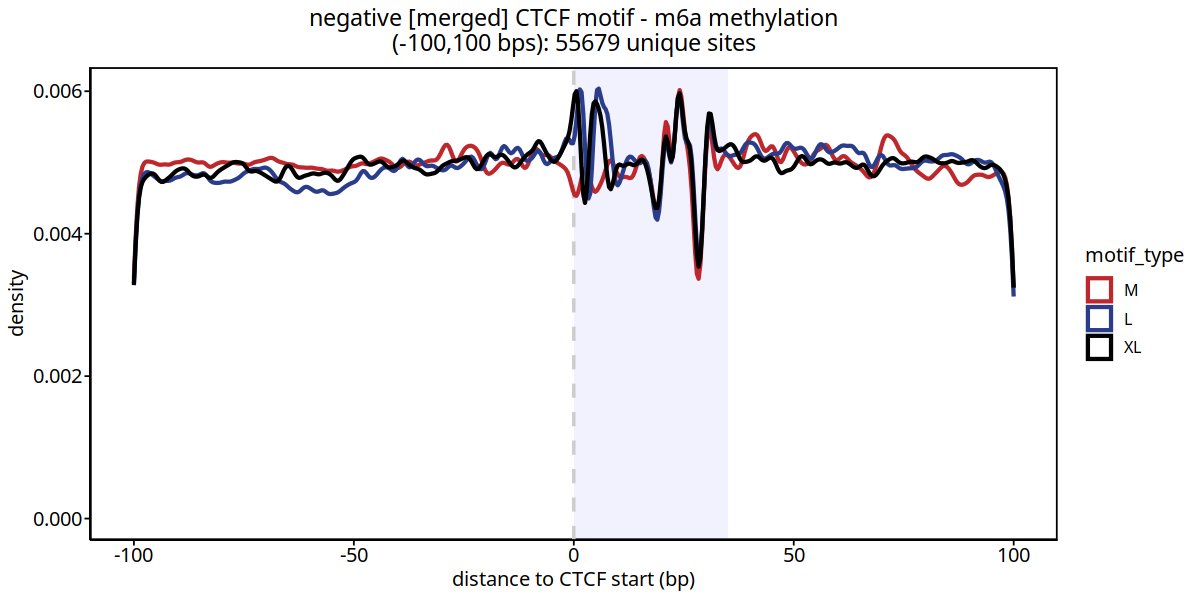

In [27]:
tic()
df_p <- df_m
df_p$motif_type <- factor(df_p$motif_type, levels=c("M", "L", "XL"))

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s [%s] CTCF motif - m6a methylation\n(%s,%s bps): %s unique strands", 
                      data_type, motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df_p$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])

p <- ggplot(df_p, aes(x=centered_start, group=motif_type)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=motif_type), size=1.2, adjust=0.5) +
    # red, blue, black
    scale_color_manual(values=c("#be282d", "#2a3d8c", "#000000")) +
    #scale_color_manual(values=c("#003f5c", "#bc5090", "#ffa600")) +
    #scale_color_aaas() +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name, n.breaks=5) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

In [31]:
head(df_m)

chrom,centering_position,strand,subset_sequence,reference_start,reference_end,query_name,centered_query_start,centered_query_end,query_length,centered_position_type,centered_start,centered_end,motif_type
<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAG,10000,26566,m54329U_210323_190418/58001273/ccs,-6803,16210,23013,m6a,-95,-94,M
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAG,10000,26566,m54329U_210323_190418/58001273/ccs,-6803,16210,23013,m6a,-92,-91,M
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAG,10000,26566,m54329U_210323_190418/58001273/ccs,-6803,16210,23013,m6a,-90,-89,M
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAG,10000,26566,m54329U_210323_190418/58001273/ccs,-6803,16210,23013,m6a,-88,-87,M
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAG,10000,26566,m54329U_210323_190418/58001273/ccs,-6803,16210,23013,m6a,-82,-81,M
chr1,10504,-,TCCTCAGCACAGACCCGGAGAGCACCGCGAGGGCGGAGCTGCGTTGTCCTCTGCACAGATTTCGGTGGTACTCTGAAGGCGGAGCACAGTTCTCCTCAGGTCAGACCCGGGCGGGCGGGCCGGCTGAGGGTACCGCGAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAG,10000,26566,m54329U_210323_190418/58001273/ccs,-6803,16210,23013,m6a,-80,-79,M


In [32]:
length(unique(df_m$query_name))

[1] 55679

In [39]:
unique_query = unique(df_m$query_name)

In [41]:
print(table(df_m[df_m$query_name == unique_query[1],]$motif_type))
print(table(df_m[df_m$query_name == unique_query[2],]$motif_type))
print(table(df_m[df_m$query_name == unique_query[3],]$motif_type))
print(table(df_m[df_m$query_name == unique_query[4],]$motif_type))


  L   M  XL 
506 678 528 

  L   M  XL 
152 186 170 

  L   M  XL 
162 137  36 

  L   M  XL 
215 261 164 


In [43]:
unique_query[1:10]

[1] "m54329U_210323_190418/58001273/ccs"  "m54329U_210323_190418/107545216/ccs"
 [3] "m54329U_210323_190418/148702267/ccs" "m54329U_210326_192251/12978426/ccs" 
 [5] "m54329U_210326_192251/171182291/ccs" "m54329U_210810_004956/65863987/ccs" 
 [7] "m54329U_210810_004956/68815147/ccs"  "m54329U_210810_004956/78316132/ccs" 
 [9] "m54329U_210810_004956/85591510/ccs"  "m54329U_210810_004956/91423766/ccs"

In [37]:
table(df_m[df_m$query_name == df_m$query_name[2],]$motif_type)


  L   M  XL 
506 678 528 

# all rows

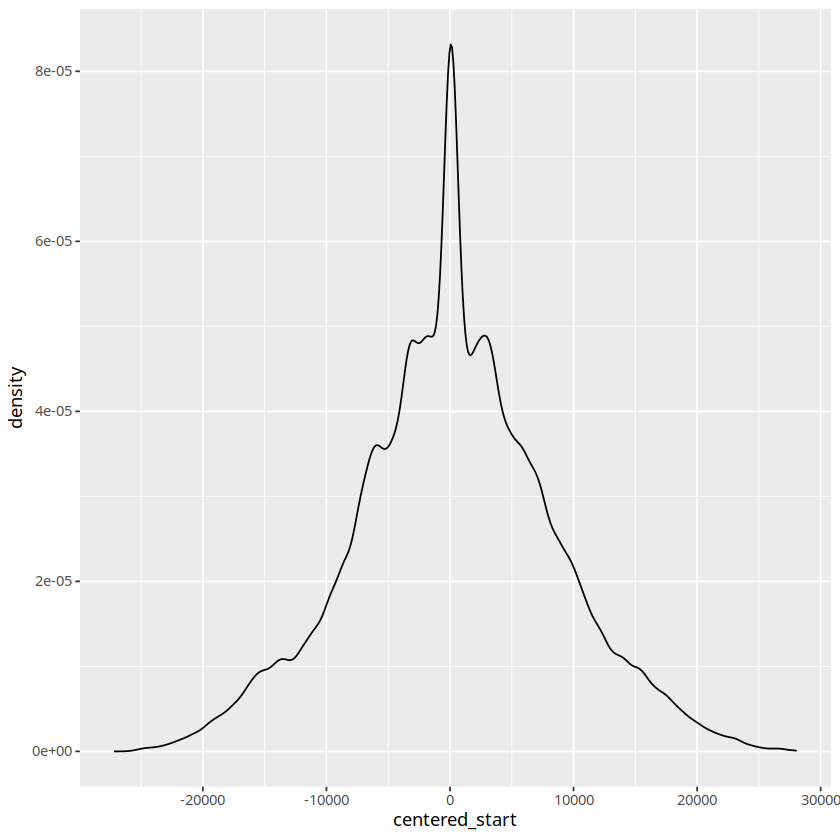

In [26]:
# all rows
p <- ggplot(df, aes(x=centered_start)) + geom_density()
p